ANN Binaria con dataset Tic-tac-toe

In [12]:
# Funciones para el procesamiento de los datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [13]:
data_origin = pd.read_csv(r'../3_Normalización/datasets/tic_tac_toe_dataset.csv')
dataset = fit_cols(data_origin, list(data_origin.columns), Ordinal)
dataset = fit_cols(dataset, dataset.columns, Min_Max)
# dataset.head(20)

In [14]:
X_train, X_test, Y_train, Y_test = split_Dataset(dataset,['class'])
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(766, 9) (766, 1)
(192, 9) (192, 1)


In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop


import matplotlib.pyplot as plt


def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

np.random.seed(7)



Adam=optimizers.Adam(lr=0.05)
Sgd=optimizers.SGD(lr=0.01)


In [18]:
def Model1():
    model = Sequential()
    model.add(Dense(20,input_dim=9,activation='relu'))
    model.add(Dense(15,activation='relu'))
    
    
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model



M=Model1()


Epoch 1/60
154/154 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8120 - val_loss: 0.4583 - val_accuracy: 0.7865
Epoch 2/60
154/154 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8211 - val_loss: 0.4490 - val_accuracy: 0.7917
Epoch 3/60
154/154 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8081 - val_loss: 0.4445 - val_accuracy: 0.7760
Epoch 4/60
154/154 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8198 - val_loss: 0.4238 - val_accuracy: 0.7708
Epoch 5/60
154/154 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8290 - val_loss: 0.4282 - val_accuracy: 0.7604
Epoch 6/60
154/154 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8329 - val_loss: 0.4147 - val_accuracy: 0.7917
Epoch 7/60
154/154 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8420 - val_loss: 0.4080 - val_accuracy: 0.7969
Epoch 

154/154 [==============================] - 0s 3ms/step - loss: 0.2306 - accuracy: 0.9047 - val_loss: 0.3411 - val_accuracy: 0.8333
Epoch 59/60
154/154 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.8982 - val_loss: 0.3315 - val_accuracy: 0.8542
Epoch 60/60
154/154 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9021 - val_loss: 0.3305 - val_accuracy: 0.8646


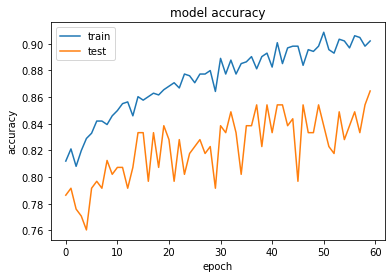

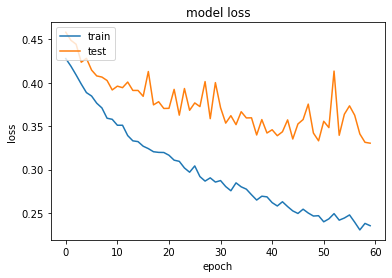

In [20]:
History=M.fit(X_train,Y_train,
              epochs=60,
              batch_size=5,
              validation_data=(X_test,Y_test))

Show_History(History)